# PyTorch Tutorial - Miniplaces Challenge (Part 1)

The miniplaces challenge is a 2 part challenge.
In the challenge, you will work on classifying scenes into one of several categories (such as "desert", or "forest") using **PyTorch**!

In this part, we'll use pretrained weights on a different dataset, but one that's also used for scene classification. We'll examine how we can visualize feature maps, to better understand how a neural net came to a decision about a particular scene.

In part 2 of this challenge, you'll implement your own neural net to do scene classification, and try to improve it as much as you can.

This challenge was adapted from MIT's [6.869: Advances in Computer Vision Course](http://6.869.csail.mit.edu/fa19/schedule.html).


## 0. Requirements installation
This challenge will implement solutions to an image classification problem, so we'll need libraries to process, manipulate, and make predictions on image data.

In [ ]:
from __future__ import print_function
!pip install Pillow==4.1.1
!pip install -U image
!pip install opencv-python

# For I/O and IPython
from io import BytesIO
from IPython.display import clear_output, Image, display

# For loading/pre-processing images
import numpy as np
import PIL.Image
import cv2

We will use **PyTorch** as our deep learning library here:

In [ ]:
# Commands to install PyTorch
!pip install torch
!pip install torchvision

# Import PyTorch package and its modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.hub

# File path
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag


## 1. Loading Images and PyTorch models


Once, we have loaded all the relevant libraries, we will load the model. We will begin with an scene classification model trained on the Places Dataset with a ResNet-50 architecture.

![texto alternativo](notebook_diagrams/resnet.png)



### 1.1 Make ResNet 50 Model Object
To load our pre-trained weights, we'll first need to make a ResNet object that we can load the pre-trained weights onto.  We can make this object using PyTorch.

In [ ]:
# Make ResNet model - 50 layers, 365 output classes
resnet = models.resnet50(num_classes=365)
print(resnet)

In [0]:
# Helper function to download things without wget
import requests
def download(url, fn=None):
  if fn is None:
    fn = url.split('/')[-1]
  r = requests.get(url)
  if r.status_code == 200:
      open(fn, 'wb').write(r.content)
      print("{} downloaded: {:.2f} KB".format(fn, len(r.content)/1024.))
  else:
      print("url not found:", url)

### 1.2 Download Weights

In [6]:
# Download the pretrained weights from MIT CSAIL
download('http://places2.csail.mit.edu/models_places365/resnet50_places365.pth.tar')

resnet50_places365.pth.tar downloaded: 94990.39 KB


### 1.3 Load Pre-Trained Model
We will load the pretrained ResNet weights into the model.  Remember that fine-tuning a pre-trained model is often significantly easier than training a model from scratch.  This is one type of transfer learning we discussed in class.

In [ ]:
# sd is short for "state dictionary" - this has information about our model
sd = torch.load('resnet50_places365.pth.tar') # pytorch 1.1
sd = sd['state_dict']
# When a model is trained on the GPU, the weights begin with "module."
# Since we aren't going to be using the GPU, we'll manually change these keys to load the state dict
sd = {k.replace('module.', ''): v for k, v in sd.items()}

# Load state dictionary
resnet.load_state_dict(sd)

# Put model into evaluation mode
resnet.eval()



## 2. Visualizing Network Filters
As we discussed in our course, visualizing the weights of our network is important for qualitatively accessing how well it's been trained, as well as gaining an intuition for what's happening under the hood in PyTorch.  PyTorch makes analyzing these weights quite accessible - let's explore these functionalities below.

### 2.1 Visualizing Arrays Function
First, we will define a function to display images from numpy arrays. 

In [0]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

Now, we will focus on visualizing the filters of the ResNet network. Let's take a look to the first layer. 

In [9]:
print(resnet.conv1.weight.data.size()) # Access convolutional filters


torch.Size([64, 3, 7, 7])


### 2.2 Visualizing Filters Function
Now, let's write a function to visualize the filters. You have to complete the following code, with one line normalizing the filter values:

In [2]:
def visualize_filters(conv_w,output_size = None):
    
    # Get min/max for normalization
    wmin, wmax = torch.min(conv_w), torch.max(conv_w)
    
    # Normalize weights
    w_normalized = (conv_w-wmin)/(wmax-wmin)
    
    # For plotting
    map_t = 255*w_normalized
    map_t = map_t.numpy()
    map_t = map_t.astype(np.uint8)
    
    # Resize if we specify an output size
    if output_size is not None:
        map_t = cv2.resize(map_t,(output_size,output_size))
    return map_t
 


### 2.3 Display Filters 
We will display the filters of the initial convolutional layer:

Visualizing conv1 filter 0
tensor(-0.3864) tensor(0.2272)


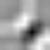

Visualizing conv1 filter 1
tensor(-0.2808) tensor(0.2280)


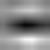

Visualizing conv1 filter 2
tensor(-0.4255) tensor(0.4087)


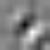

Visualizing conv1 filter 3
tensor(-0.2906) tensor(0.3927)


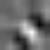

Visualizing conv1 filter 4
tensor(-0.2573) tensor(0.2658)


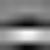

Visualizing conv1 filter 5
tensor(-0.3512) tensor(0.2674)


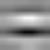

Visualizing conv1 filter 6
tensor(-0.0370) tensor(0.0872)


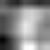

Visualizing conv1 filter 7
tensor(-0.2836) tensor(0.3681)


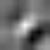

Visualizing conv1 filter 8
tensor(-0.1836) tensor(0.1868)


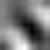

Visualizing conv1 filter 9
tensor(-0.1304) tensor(0.3293)


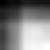

Visualizing conv1 filter 10
tensor(-0.0162) tensor(0.0796)


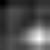

Visualizing conv1 filter 11
tensor(-0.1016) tensor(0.0509)


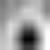

Visualizing conv1 filter 12
tensor(-0.0319) tensor(0.0848)


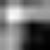

Visualizing conv1 filter 13
tensor(-0.4205) tensor(0.4031)


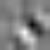

Visualizing conv1 filter 14
tensor(-0.2407) tensor(0.2374)


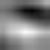

Visualizing conv1 filter 15
tensor(-0.2242) tensor(0.0965)


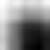

Visualizing conv1 filter 16
tensor(-0.0650) tensor(0.1230)


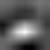

Visualizing conv1 filter 17
tensor(-0.0013) tensor(0.0040)


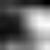

Visualizing conv1 filter 18
tensor(-0.0220) tensor(0.0367)


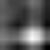

Visualizing conv1 filter 19
tensor(-0.0874) tensor(0.1354)


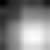

Visualizing conv1 filter 20
tensor(-0.0095) tensor(0.0504)


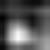

Visualizing conv1 filter 21
tensor(-0.1580) tensor(0.0495)


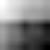

Visualizing conv1 filter 22
tensor(-0.3754) tensor(0.2758)


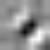

Visualizing conv1 filter 23
tensor(-0.1715) tensor(0.1510)


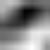

Visualizing conv1 filter 24
tensor(-0.3755) tensor(0.2770)


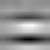

Visualizing conv1 filter 25
tensor(-0.0135) tensor(0.0159)


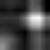

Visualizing conv1 filter 26
tensor(-0.0362) tensor(0.0480)


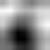

Visualizing conv1 filter 27
tensor(-0.2073) tensor(0.1897)


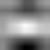

Visualizing conv1 filter 28
tensor(-0.1961) tensor(0.2241)


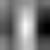

Visualizing conv1 filter 29
tensor(-0.4556) tensor(0.3448)


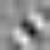

In [11]:
# Iterate through the channels of the first convolutional layer
for i in range(30):
  print('Visualizing conv1 filter',i)
  vis = visualize_filters(resnet.conv1.weight.data[i,0,:,:],50)
  showarray(vis)


### 2.4 Exercise: Visualize filters for another convolutional layer in ResNet

In [ ]:
# Iterate through channels in another convolutional layer in ResNet
for i in range(30):
  print('Visualizing conv2 filter',i)
  vis_conv2 = visualize_filters(resnet.layer3[0].conv2.weight.data[i,0,:,:],50)
  showarray(vis_conv2)


## 3. Predicting classes with a pre-trained model
If the dataset the pre-trained model is trained on is similar enough to ours, we can likely use the pre-trained model for predicting directly on our dataset without any fine tuning! (Though this is quite often **not** the case, since dataset distributions usually differ significantly in terms of output classes, illumination, contrast, etc.)

To make the process easier to read, we will load the label <--> index assignament for the Places dataset. 

In [0]:
# Load labels
from urllib.request import urlopen

synset_url = 'http://gandissect.csail.mit.edu/models/categories_places365.txt'
classlabels = [r.split(' ')[0][3:] for r in urlopen(synset_url).read().decode('utf-8').split('\n')]


### 3.1 Load Image
We will load one image to use through this exercise. 

rio.jpg downloaded: 178.28 KB


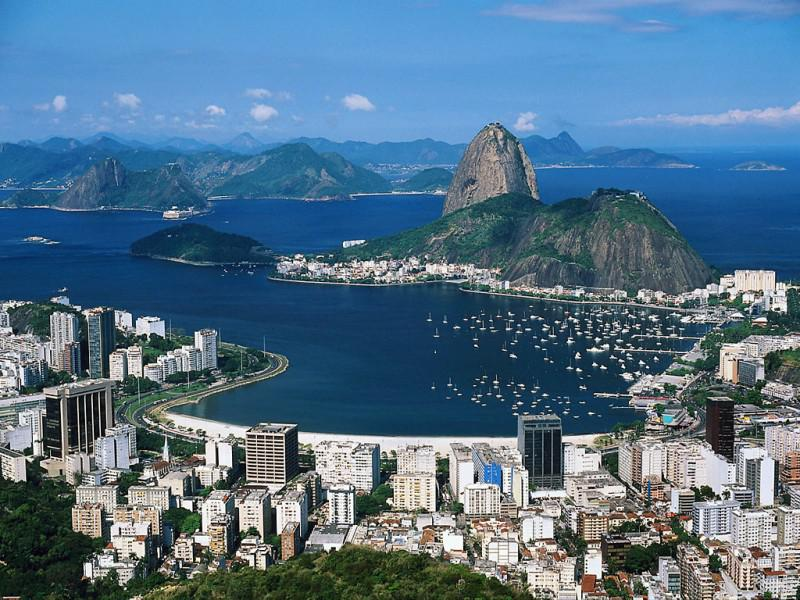

In [14]:
# Use for image pre-processing with PyTorch
from torchvision import transforms

# Download image
download('http://6.869.csail.mit.edu/fa19/miniplaces_part1/rio.jpg')
img0 = PIL.Image.open('rio.jpg').convert('RGB')
  
# Get numpy array
img_numpy = np.array(img0)

# Display image
showarray(img_numpy)

### 3.2 View Predictions from Image

First, let's take a look at the raw prediction of the model.

You can find the ImageNet classes here: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [15]:
# Use torchvision transforms to pre-process the image so that it's ready for inference
center_crop = transforms.Compose([
         transforms.Resize((227,227)),
         transforms.ToTensor(),
         transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

# Preprocess image
im = center_crop(img0)

# Make prediction on image
out = resnet(im.unsqueeze(0)).squeeze()

# Output dimensions
print("Output dimensions: \n", out.size())

# Use topk(5) function to get top 5 classes.  This is available whenever we have a classification output
categories = out.topk(5)[1]

# Print predicted classes for images
print(categories)
print(classlabels[categories[0]])
print(classlabels[categories[1]])
print(classlabels[categories[2]])
print(classlabels[categories[3]])
print(classlabels[categories[4]])

torch.Size([365])
tensor([348, 194,  49,  97, 171])
village
islet
beach_house
coast
harbor


## 4. Visualizing Internal Activations of the Network

Let's look at what parts of the image cause different units to activate (send some positive signal). All of these activations combine to inform the final inference. 

The convolutional layers of ResNet essentially make a semantic representation of what is contained in the image. This is followed by two fully connected layers, which use the information from that representation to categorize the image.

So, let's remove the last few layers (which do classification) to get the underlying representation, and we'll visualize the activations that went into that representation from different units

### 4.1 Featuremap Generation Function
Let's define a function to use for generating the internal activations of our network.

In [0]:
def generate_featuremap_unit(resnet,unit_id,im_input):
    
    # Extract activation from model
    model_cut  = nn.Sequential(*list(resnet.children())[:-2]) # Removes last two layers of ResNet50
    # Mark the model as being used for inference
    model_cut.eval()
    # Crop the image
    im = center_crop(im_input)
    # Place the image into a batch of size 1, and use the model to get an intermediate representation
    out = model_cut(im.unsqueeze(0))
    # Print the shape of our representation
    print(out.size())
    # Extract the only result from this batch, and take just the `unit_id`th channel
    out_final = out.squeeze()[unit_id]
    # Return this channel
    return out_final

### 4.2 Featuremap Visualization Function
Let's define a function to use for visualizing the internal activations of our network.

In [0]:
def visualize_featuremap(im_input,feature_map,alpha=0.3):
    
    # Normalize to [0..1], with a little leeway (0.9999) in case feature_map has 0 range
    feature_map = feature_map/(feature_map.max()+1e-10)
    # Convert to numpy (detach() just seperates a tensor from the gradient)
    feat_numpy = feature_map.detach().numpy()
    # Resize the feature map to our original image size (our strided conv layers reduce the size of the image)
    feat_numpy = cv2.resize(feat_numpy,(im_input.shape[1],im_input.shape[0]))
    # Invert to make the heatmap look more natural
    map_t = 1-feat_numpy
    # Add an extra dimension to make this a [H,W,C=1] image 
    feat_numpy = np.expand_dims(feat_numpy, axis=2)
    
    # Convert to image (UINT8 from 0-255)
    map_t = 255*map_t
    map_t = map_t.astype(np.uint8)
    # Use a color map to change this from BW to a nice color
    map_t = cv2.applyColorMap(map_t, cv2.COLORMAP_JET)
    # Combine the heatmap with the original image so you can see which section of the image is activated
    im_final = np.multiply((alpha*im_input + (1-alpha)*map_t), feat_numpy) + np.multiply(im_input, 1-feat_numpy)
    # Return final visualization
    return im_final


### 4.3 Display Featuremap Activations
Now we can see what these feature maps look like when overlayed with the image!  We can also use these feature maps to enhance our understanding and intuition about CNNs, and provide ourselves with sanity checks on how well our model is doing as a classification framework.

torch.Size([1, 2048, 8, 8])


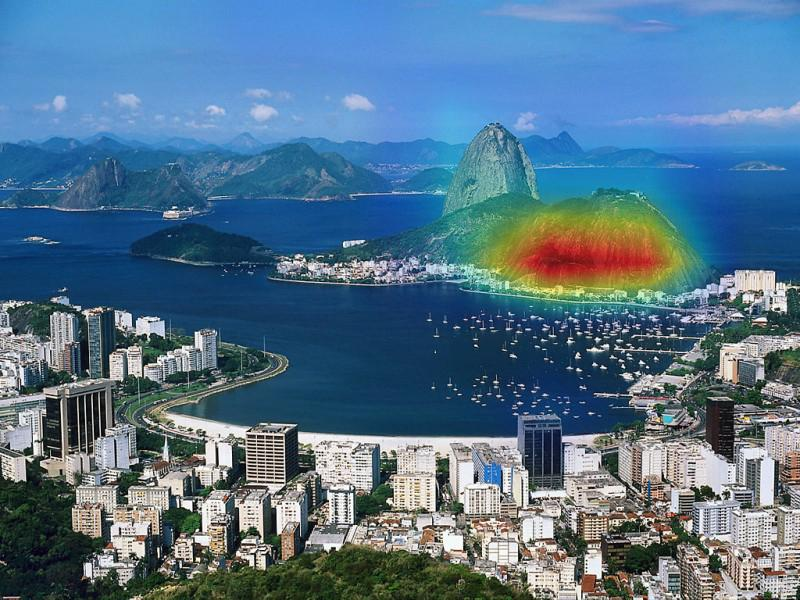

In [18]:
# Generate feature map
feat = generate_featuremap_unit(resnet,300,img0) # Detects mountains well

# Visualize feature map
im_final = visualize_featuremap(img_numpy,feat)

# Display image for overlay
showarray(im_final)

### 4.4 Exercise: Find other units that detect other relevant concepts in the image. 
Change the unit numbers (the second argument in `generate_featuremap_unit` that detect the following areas of a map well.  By default, these have been set to zero, but you should try finding numbers between 0 and 365 that are able to identify the parts of the image according to the comment on the right (e.g. "village", "coast", "harbor" are some of the feature maps you should be looking for.)

In [ ]:
feat = generate_featuremap_unit(resnet,0,img0) # Detects village well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 0, img0) # Detects coast well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 0, img0) # Detects coast/harbor well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 0, img0) # Detects harbor well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 0, img0) # Detects sky/coast well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

feat = generate_featuremap_unit(resnet, 0, img0) # Detects coast/harbor well
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)


### 4.5 Exercise: Deactivate the Highest Activation
Find the unit index that has the maximum weights in the fully connected layer and deactivate that unit. Compare the orginal prediction and the new prediction.

This has already been done for you, but try to take the time here to understand what's going on.

In [ ]:
# For plotting
import matplotlib.pyplot as plt

# Get original predictions and classes
out_original = resnet(im.unsqueeze(0)).squeeze() #origianl prediction 
sorted_classes = np.argsort(-out_original.data.cpu().numpy())
class_ids = sorted_classes[:5][0]
print("top 1 class id:", class_ids)
# Torch.max will help - returns (maxvalue,maxindex)
_, index = torch.max(resnet.fc.weight[class_ids,:], 0) #find the unit index that has the maximum weights in the fully connected layer 

# Now remove the last 2 layers of resnet (the fully connected layers)
model_cut = nn.Sequential(*list(resnet.children())[:-2]) # Removes last two layers of ResNet50

# Get the representation for this model
out1 = model_cut(im.unsqueeze(0))
# Shape is now (1, # units, H, W)

# Set unit values to zero for unit with maximum weights
unit = out1[:,index,:,:] # Get maximum-weighted unit
unit = torch.zeros(unit.shape) # Make array of zeros of unit's size
out1[:,index,:,:] = unit # Set unit kernel to be all zeros

out2 = resnet.fc(resnet.avgpool(out1).squeeze().unsqueeze(0)).squeeze()

def plot_top_classes(values, top_k=5, title = None):
  sorted_classes = np.argsort(-values)
  class_ids = sorted_classes[:top_k]
  class_names = [classlabels[it] for it in list(class_ids)]
  class_values = values[class_ids]
  print(title + " top 5 class names ", class_names)
  print(title + " top 5 class values ", class_values)
  plt.bar(class_names, class_values)
  plt.xticks(rotation=60)
  plt.title(title)

plt.figure(0)
plot_top_classes(out.data.cpu().numpy(), title = 'Original')
plt.figure(1)
plot_top_classes(out2.data.cpu().numpy(), title = 'Modified')

# Now let's view the feature maps for this unit 
feat = generate_featuremap_unit(resnet, index, img0) 
im_final = visualize_featuremap(img_numpy,feat)
showarray(im_final)

## 5. Visualizing model activations with Class Activation Models (CAMs)
We can extend the framework above with our feature map activations into a more general framework of Class Activation Models (CAMs).  These are very useful for visualizing the internal states of the network.

Another note: One nice feature of Class Activation Models is that they offer **interpretability** for our CNN models - CAMs enable the CNN to tell the user/other stakeholders what exactly it to make certain predictions.  Consider the uses of this interpretability for situations such as pitching a CNN-based framework to different stakeholders.

Once we have load the image and the model, now we will explore how to visualize the internal activations of the model. We will start by visualizing which parts of the image are responsibe for the final decision. 

![texto alternativo](https://camo.githubusercontent.com/fb9a2d0813e5d530f49fa074c378cf83959346f7/687474703a2f2f636e6e6c6f63616c697a6174696f6e2e637361696c2e6d69742e6564752f6672616d65776f726b2e6a7067)



We create a version of the model without the last two layers, so that we can access the last convolutional layer.

In [ ]:
#TODO: remove the last 2 layers of resnet 
model = nn.Sequential(*list(resnet.children())[:-2])
model.eval()

We compute the activations using the Class Activation Mapping for a given output label. 

In [0]:
def generate_featuremap_CAM(model,unit_id,im_input):
    #Extract activation from model
    
    im = center_crop(im_input)
    model.eval()
    out = model(im.unsqueeze(0)) #1 x 2048 x h x w
    w = out.size(3)
    h = out.size(2)
    b = out.size(0)
    c = out.size(1)
    print(out.size())
    # print(b,c,h,w)
    # fc input: N x 2048

    # View tensor size before
    print("Old tensor shape is: {}".format(out.shape))

    # Now reshape tensor and take transpose
    out = out.view(c,w*h)
    out = torch.t(out)

    # View tensor size before
    print("New tensor shape is: {}".format(out.shape))
    
    # Create "neural network" consisting only of fully connected layer and activation
    FC_layer = nn.Sequential(*list(resnet.children())[-1:])

    # Feed output averaged tensor into this "fully connected network"
    out_final = FC_layer(out)
    print(out_final.size())
    
    out_final = out_final.view(b,h*w,-1).transpose(1,2).view(b,-1,h,w)
    print(out_final.size())
    out_final = out_final.squeeze()[unit_id]
    # print(out_final.size())
    return out_final
    

    


We can visualize the most activated region in the image for the 5 main top classes. 

Visualizing category village
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


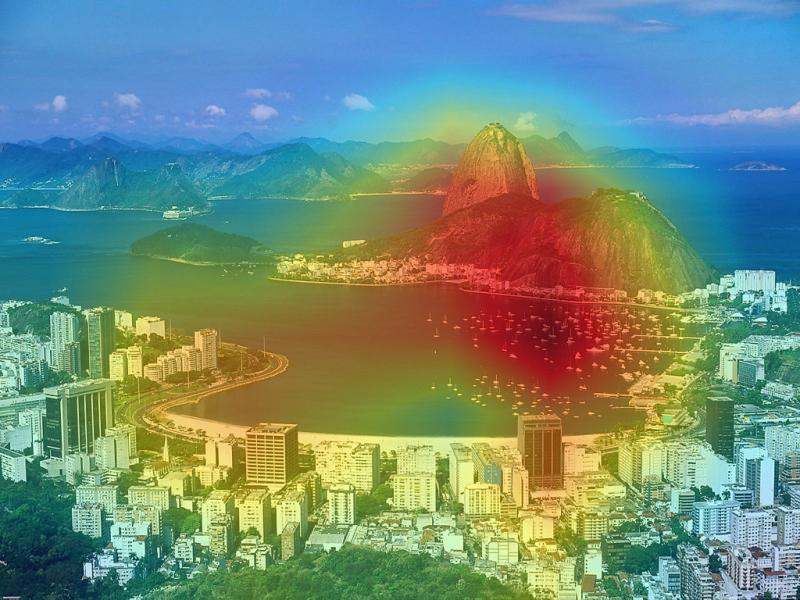

Visualizing category islet
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


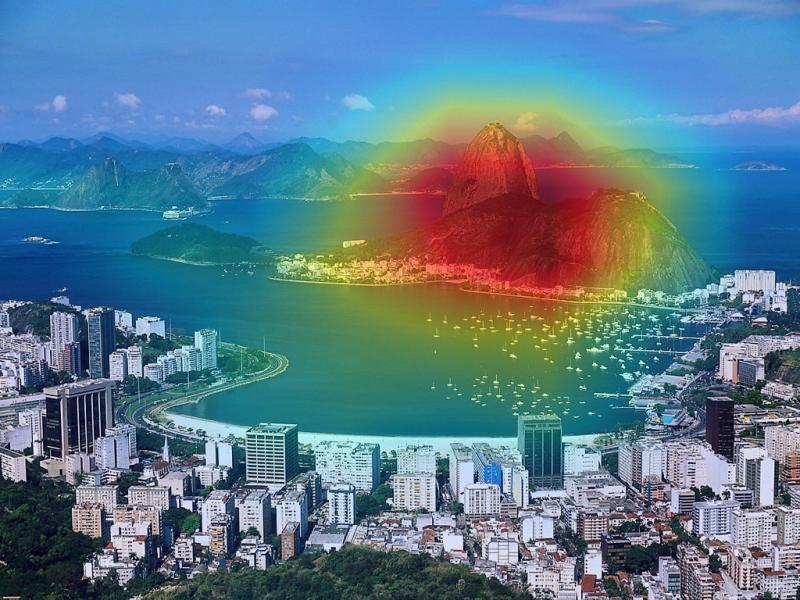

Visualizing category beach_house
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


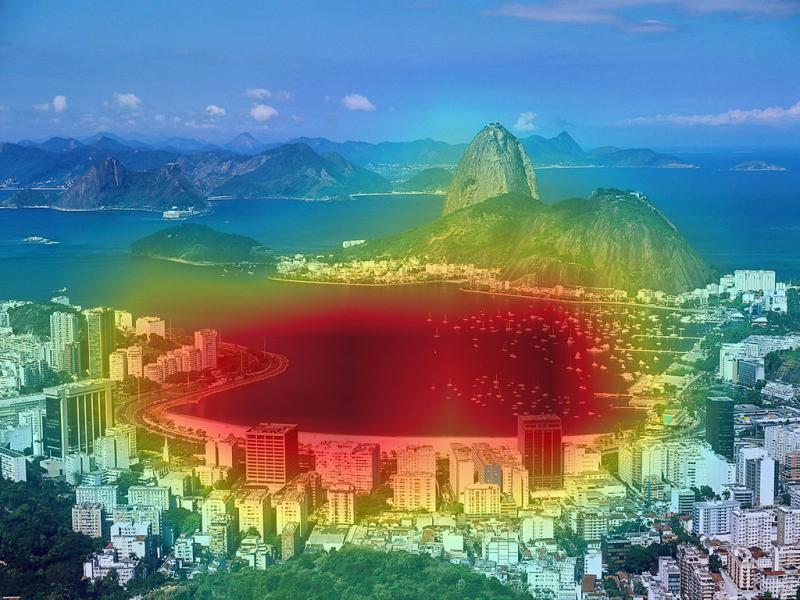

Visualizing category coast
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


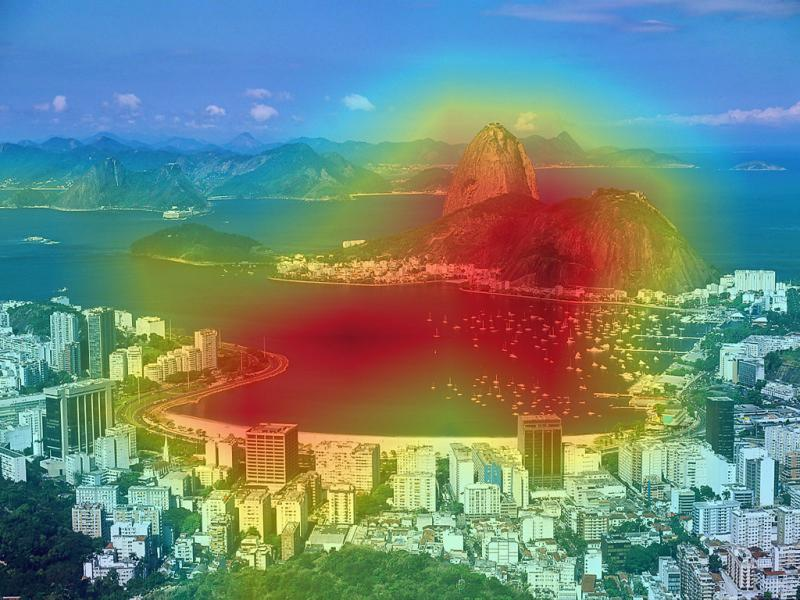

Visualizing category harbor
torch.Size([1, 2048, 8, 8])
Old tensor shape is: torch.Size([1, 2048, 8, 8])
New tensor shape is: torch.Size([64, 2048])
torch.Size([64, 365])
torch.Size([1, 365, 8, 8])


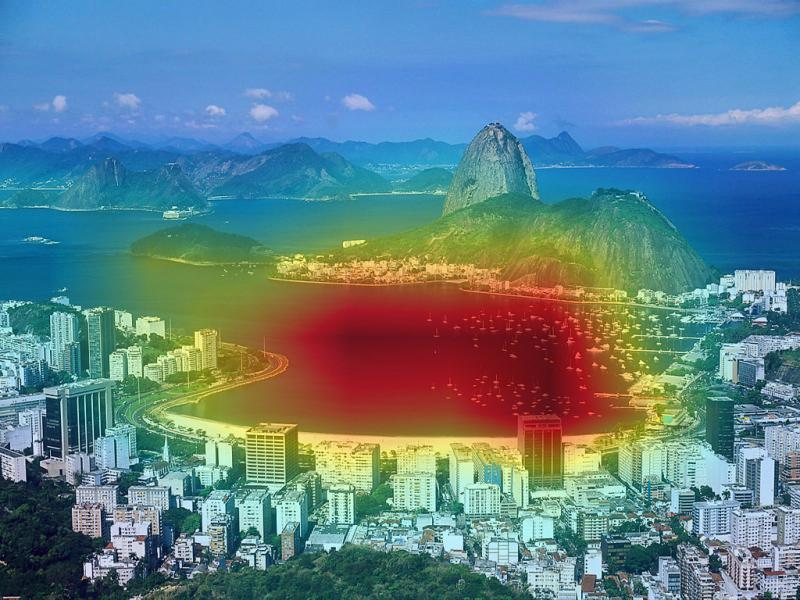

In [0]:
for i in range(categories.shape[0]):
  print('Visualizing category',classlabels[categories[i]])
  feat = generate_featuremap_CAM(model, categories[i].item(),img0)
  im_result = visualize_featuremap(img_numpy,feat)
  showarray(im_result)


# Miniplaces Part II
Now that we've explored some of the data and models we'll be looking at, and have created some functions for visualizing and better understanding the internal workings of our neural network model, we are now ready to train our own model.  In this section, we'll be training a model from scratch.  If you choose to train your model on a Jupyter notebook (as the code will do below), we highly recommend running this inside a `tmux` or `screen` session, and to run this code on a GPU-enabled machine (e.g. Amazon EC2 or Google Cloud compute).  If these machines aren't available to you, you can also try running this on Google colab using their free GPU access. 

## 6. Downloading the dataset

You can download the dataset from <http://6.869.csail.mit.edu/fa19/miniplaces_part2/data.zip>

The entire dataset is also available unzipped in Google Drive from \
<https://drive.google.com/drive/folders/1-IvzghOb7mesv3d-AvYpbtY9HCwQfisQ?usp=sharing> \
If you're using Google Colab, you should use this folder and "Add to My Drive", since then it will count against the Teaching Staff's Google Drive quota instead of your own.

Unzip this to some directory. Our data folder follows the format of the `ImageFolder` class <https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder>

In [ ]:
import os
expected_name = "Miniplaces_Part2.ipynb"

# Colab specific setup
try:
  from google.colab import drive
  
except Exception:
  # Local setup
  rootpath = "."

else:
  drive.mount('/content/gdrive')
  print("This will take a while, depending on how many folders you have in your google drive (your drive has to be mounted into the machine)")
  rootpath = None
  for (parent_dir, subfolders, subfiles) in os.walk('/content/gdrive'):
    if expected_name in subfiles:
      print("Found this file! Setting root path to: %s" % parent_dir)
      rootpath = parent_dir
      break
  if rootpath is None:
    raise Exception("Could not find this notebook (%s). Did you change the name? If so, change expected_name variable" % expected_name)

In [ ]:
# Specify directory for data
data_dir = "../data"

## 7. Training Your Model Reference

Now, we'll train a model. This code was adapted from <https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html>

You are free to delete this code entirely and start from scratch, or modify it in whatever way you choose.

## 8. Installation Block for Part II
Some of these libraries have been imported already - this is ok!  We'll again be using PyTorch for this section to train and test our models.

In [ ]:
# Import PyTorch package and its modules
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time

# You might not have tqdm, which gives you nice progress bars
!pip install tqdm
from tqdm.notebook import tqdm

# For file paths and copying objects
import os
import copy

# Get PyTorch version
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

# Detect if we have a GPU available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# If we have a GPU
if torch.cuda.is_available():
    print("Using the GPU!")

# If we don't have a GPU
else:
    print("WARNING: Could not find GPU! Using CPU only")

## 9. Training

### 9.1 Initialize an Empty Model

First, we need to initialize an empty model, that will input an image, and output a classification. Each model is a little different, so we'll make a helper function that takes in an architecture name, and outputs a model. This is only meant as a guideline, and you can try using different models! `torchvision.models` has other common architectures, and variations on these (like ResNet-50 and ResNet-101), so you may want to try those out.

We also add a `resume_from` argument to specify model weights to load, In case you save a model and want to use it again.

In [ ]:
def initialize_model(model_name, num_classes, resume_from = None):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    # The model (nn.Module) to return
    model_ft = None
    # The input image is expected to be (input_size, input_size)
    input_size = 0
    
    # You may NOT use pretrained models!! 
    use_pretrained = False
    
    # By default, all parameters will be trained (useful when you're starting from scratch)
    # Within this function you can set .requires_grad = False for various parameters, if you
    # don't want to learn them

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes) 
        input_size = 224

    else:
        raise Exception("Invalid model name!")
    
    if resume_from is not None:
        print("Loading weights from %s" % resume_from)
        model_ft.load_state_dict(torch.load(resume_from))
    
    return model_ft, input_size

## 9.2 Data Loading

With the input size from the model, we can now load the dataset.  PyTorch uses some really nice pipeline objects for storing and inputting data into the model during training, validation, and testing known as `Dataset` and `DataLoader` objects.  If you plan on writing your own machine learning pipeline with PyTorch, it is strongly recommended you use these objects for data ingestion.

In [ ]:
def get_dataloaders(input_size, batch_size, shuffle = True):
    # How to transform the image when you are loading them.
    # you'll likely want to mess with the transforms on the training set.
    
    # For now, we resize/crop the image to the correct input size for our network,
    # then convert it to a [C,H,W] tensor, then normalize it to values with a given mean/stdev. These normalization constants
    # are derived from aggregating lots of data and happen to produce better results.
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'test': transforms.Compose([
            transforms.Resize(input_size),
            transforms.CenterCrop(input_size),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    }
    # Create training and validation datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in data_transforms.keys()}
    # Create training and validation dataloaders
    # Never shuffle the test set
    dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=False if x != 'train' else shuffle, num_workers=4) for x in data_transforms.keys()}
    return dataloaders_dict

### 9.3 Training
Next, let's make a helper function that trains the given model, using our model and dataloaders defined above.

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, save_dir = None, save_all_epochs=False, num_epochs=25):
    '''
    model: The NN to train
    dataloaders: A dictionary containing at least the keys 
                 'train','val' that maps to Pytorch data loaders for the dataset
    criterion: The Loss function
    optimizer: The algorithm to update weights 
               (Variations on gradient descent)
    num_epochs: How many epochs to train for
    save_dir: Where to save the best model weights that are found, 
              as they are found. Will save to save_dir/weights_best.pt
              Using None will not write anything to disk
    save_all_epochs: Whether to save weights for ALL epochs, not just the best
                     validation error epoch. Will save to save_dir/weights_e{#}.pt
    '''
    since = time.time()

    val_acc_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            # TQDM has nice progress bars
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    # torch.max outputs the maximum value, and its index
                    # Since the input is batched, we take the max along axis 1
                    # (the meaningful outputs)
                    _, preds = torch.max(outputs, 1)

                    # backprop + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

### 9.4 Optimizer & Loss
We need a loss function, and an optimization function to use to try to reduce that loss.  Remember that these are key aspects of designing a successful and robust neural network model in PyTorch.

In [ ]:
def make_optimizer(model):
    # Get all the parameters
    params_to_update = model.parameters()
    print("Params to learn:")
    for name, param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

    # Use SGD
    optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
    return optimizer

def get_loss():
    # Create an instance of the loss function
    criterion = nn.CrossEntropyLoss()
    return criterion

### 9.5 Inputs and Hyperparameters
Here, we set up some of the various parameters that we can change to run the code. You can add change the values given here, or add new ones! This is just a template.

Our data is conveniently set up to follow the expected format of the  `ImageFolder <https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.ImageFolder>`__
dataset class, rather than writing our own custom dataset.

The ``model_name`` input is the name of the model you wish to use. We've provided starter code that initializes these models using provided models in TorchVision (a PyTorch library)

The code as is supports the following values: [resnet, alexnet, vgg, squeezenet, densenet]

The other inputs are as follows: ``num_classes`` is the number of
classes in the dataset, 100 here, ``batch_size`` is the batch size used for
training and may be adjusted according to the capability of your
machine, ``num_epochs`` is the number of training epochs (passes through the dataset) we want to run.




In [ ]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet]
# You can add your own, or modify these however you wish!
model_name = "resnet"

# Number of classes in the dataset
# Miniplaces has 100
num_classes = 100

# Batch size for training (change depending on how much memory you have)
# You should use a power of 2.
batch_size = 8

# Shuffle the input data?
shuffle_datasets = True

# Number of epochs to train for 
num_epochs = 10

### IO
# Path to a model file to use to start weights at
resume_from = None

# Directory to save weights to
save_dir = "weights"
os.makedirs(save_dir, exist_ok=True)

# Save weights for all epochs, not just the best one
save_all_epochs = False



## 10. Tying it all together - Time to Train Your Model!
With our model, dataloaders, optimizer, loss, and hyperparameters specified, we're now ready to train!

In [ ]:
# Initialize the model for this run
model, input_size = initialize_model(model_name = model_name, num_classes = num_classes, resume_from = resume_from)
dataloaders = get_dataloaders(input_size, batch_size, shuffle_datasets)
criterion = get_loss()

# Move the model to the gpu if needed
model = model.to(device)

optimizer = make_optimizer(model)

# Train the model!
trained_model, validation_history = train_model(model=model, dataloaders=dataloaders, criterion=criterion, optimizer=optimizer,
           save_dir=save_dir, save_all_epochs=save_all_epochs, num_epochs=num_epochs)

## 11. Inference
Now that we've trained a model, we would like to evaluate its performance (on the validation data), and use it for inference (on the test data). We're going to perform top-5 inference - that is, our model will get to output 5 guesses for a given image.

### 11.1 Define Evaluation Function
We'll use this function below for evaluating our model.

In [ ]:
def evaluate(model, dataloader, criterion, is_labelled = False, generate_labels = True, k = 5):
    # If is_labelled, we want to compute loss, top-1 accuracy and top-5 accuracy
    # If generate_labels, we want to output the actual labels
    # Set the model to evaluate mode
    model.eval()
    running_loss = 0
    running_top1_correct = 0
    running_top5_correct = 0
    predicted_labels = []
    

    # Iterate over data.
    # TQDM has nice progress bars
    for inputs, labels in tqdm(dataloader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        tiled_labels = torch.stack([labels.data for i in range(k)], dim=1) 
        # Makes this to calculate "top 5 prediction is correct"
        # [[label1 label1 label1 label1 label1], [label2 label2 label2 label label2]]

        # forward
        # track history if only in train
        with torch.set_grad_enabled(False):
            # Get model outputs and calculate loss
            outputs = model(inputs)
            if is_labelled:
                loss = criterion(outputs, labels)

            # torch.topk outputs the maximum values, and their indices
            # Since the input is batched, we take the max along axis 1
            # (the meaningful outputs)
            _, preds = torch.topk(outputs, k=5, dim=1)
            if generate_labels:
                # We want to store these results
                nparr = preds.cpu().detach().numpy()
                predicted_labels.extend([list(nparr[i]) for i in range(len(nparr))])

        if is_labelled:
            # statistics
            running_loss += loss.item() * inputs.size(0)
            # Check only the first prediction
            running_top1_correct += torch.sum(preds[:, 0] == labels.data)
            # Check all 5 predictions
            running_top5_correct += torch.sum(preds == tiled_labels)
        else:
            pass

    # Only compute loss & accuracy if we have the labels
    if is_labelled:
        epoch_loss = float(running_loss / len(dataloader.dataset))
        epoch_top1_acc = float(running_top1_correct.double() / len(dataloader.dataset))
        epoch_top5_acc = float(running_top5_correct.double() / len(dataloader.dataset))
    else:
        epoch_loss = None
        epoch_top1_acc = None
        epoch_top5_acc = None
    
    # Return everything
    return epoch_loss, epoch_top1_acc, epoch_top5_acc, predicted_labels    

### 11.2 Evaluate Your Model
Using the model above, we are now ready to evaluate our model!

In [ ]:
# Get data on the validation set
# Setting this to false will be a little bit faster
generate_validation_labels = True
val_loss, val_top1, val_top5, val_labels = evaluate(model, dataloaders['val'], criterion, is_labelled = True, generate_labels = generate_validation_labels, k = 5)

# Get predictions for the test set
_, _, _, test_labels = evaluate(model, dataloaders['test'], criterion, is_labelled = False, generate_labels = True, k = 5)


## 12. Human-Readable Inference

Now that we have predicted labels for our data, let's convert the predictions into a nice JSON that we can interpret!

**NOTE**: This will only work if you are NOT shuffling your dataset!

In [ ]:
''' These convert your dataset labels into nice human readable names '''

import json

def label_number_to_name(lbl_ix):
    return dataloaders['val'].dataset.classes[lbl_ix]

def dataset_labels_to_names(dataset_labels, dataset_name):
    # dataset_name is one of 'train','test','val'
    dataset_root = os.path.join(data_dir, dataset_name)
    found_files = []
    for parentdir, subdirs, subfns in os.walk(dataset_root):
        parentdir_nice = os.path.relpath(parentdir, dataset_root)
        found_files.extend([os.path.join(parentdir_nice, fn) for fn in subfns if fn.endswith('.jpg')])
    # Sort alphabetically, this is the order that our dataset will be in
    found_files.sort()
    # Now we have two parallel arrays, one with names, and the other with predictions
    assert len(found_files) == len(dataset_labels), "Found more files than we have labels"
    preds = {os.path.basename(found_files[i]):list(map(label_number_to_name, dataset_labels[i])) for i in range(len(found_files))}
    return preds
    

test_labels_js = dataset_labels_to_names(test_labels,"test")

output_test_labels = "test_set_predictions"
output_salt_number = 0

output_label_dir = "."

while os.path.exists(os.path.join(output_label_dir, '%s%d.json' % (output_test_labels, output_salt_number))):
    output_salt_number += 1
    # Find a filename that doesn't exist
    

with open(os.path.join(output_label_dir, '%s%d.json' % (output_test_labels, output_salt_number)), "w") as f:
    json.dump(test_labels_js, f, sort_keys=True, indent=4)
    
print("Wrote predictions to:\n%s" % os.path.abspath(os.path.join(output_label_dir, '%s%d.json' % (output_test_labels, output_salt_number))))
